## Unsupervised Learning Project

In [1]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_df = pd.read_csv('cars-dataset.csv')

In [3]:
data_df.head(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190,3850,8.5,70,15.0


In [4]:
data_df.shape

(398, 8)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


- 'hp' column is having objet type. need to check the non-numeric values.

In [6]:
data_df.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [7]:
data_df.describe()

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


- HP column is missing.

In [8]:
data_df['hp'].isin(['?']).sum()

6

- 6 non numeric '?' values are present.

In [9]:
data_df.describe(include= 'all')

,car name,cyl,disp,hp,wt,acc,yr,mpg
count,398,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000
unique,305,NaN,NaN,94,NaN,NaN,NaN,NaN
top,ford pinto,NaN,NaN,150,NaN,NaN,NaN,NaN
freq,6,NaN,NaN,22,NaN,NaN,NaN,NaN
mean,NaN,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,23.514573
std,NaN,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,7.815984
min,NaN,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,9.000000
25%,NaN,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,17.500000
50%,NaN,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,23.000000
75%,NaN,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,29.000000


In [10]:
data_df = data_df.drop('car name',axis=1)

In [11]:
data_df = data_df.replace('?', np.nan)
data_df = data_df.apply(lambda x: x.fillna(x.median()),axis=0)

In [12]:
data_df['hp'] = data_df['hp'].astype('float64')  

In [13]:
data_df.dtypes

cyl       int64
disp    float64
hp      float64
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

In [14]:
data_df['hp'].isin(['?']).sum()

0

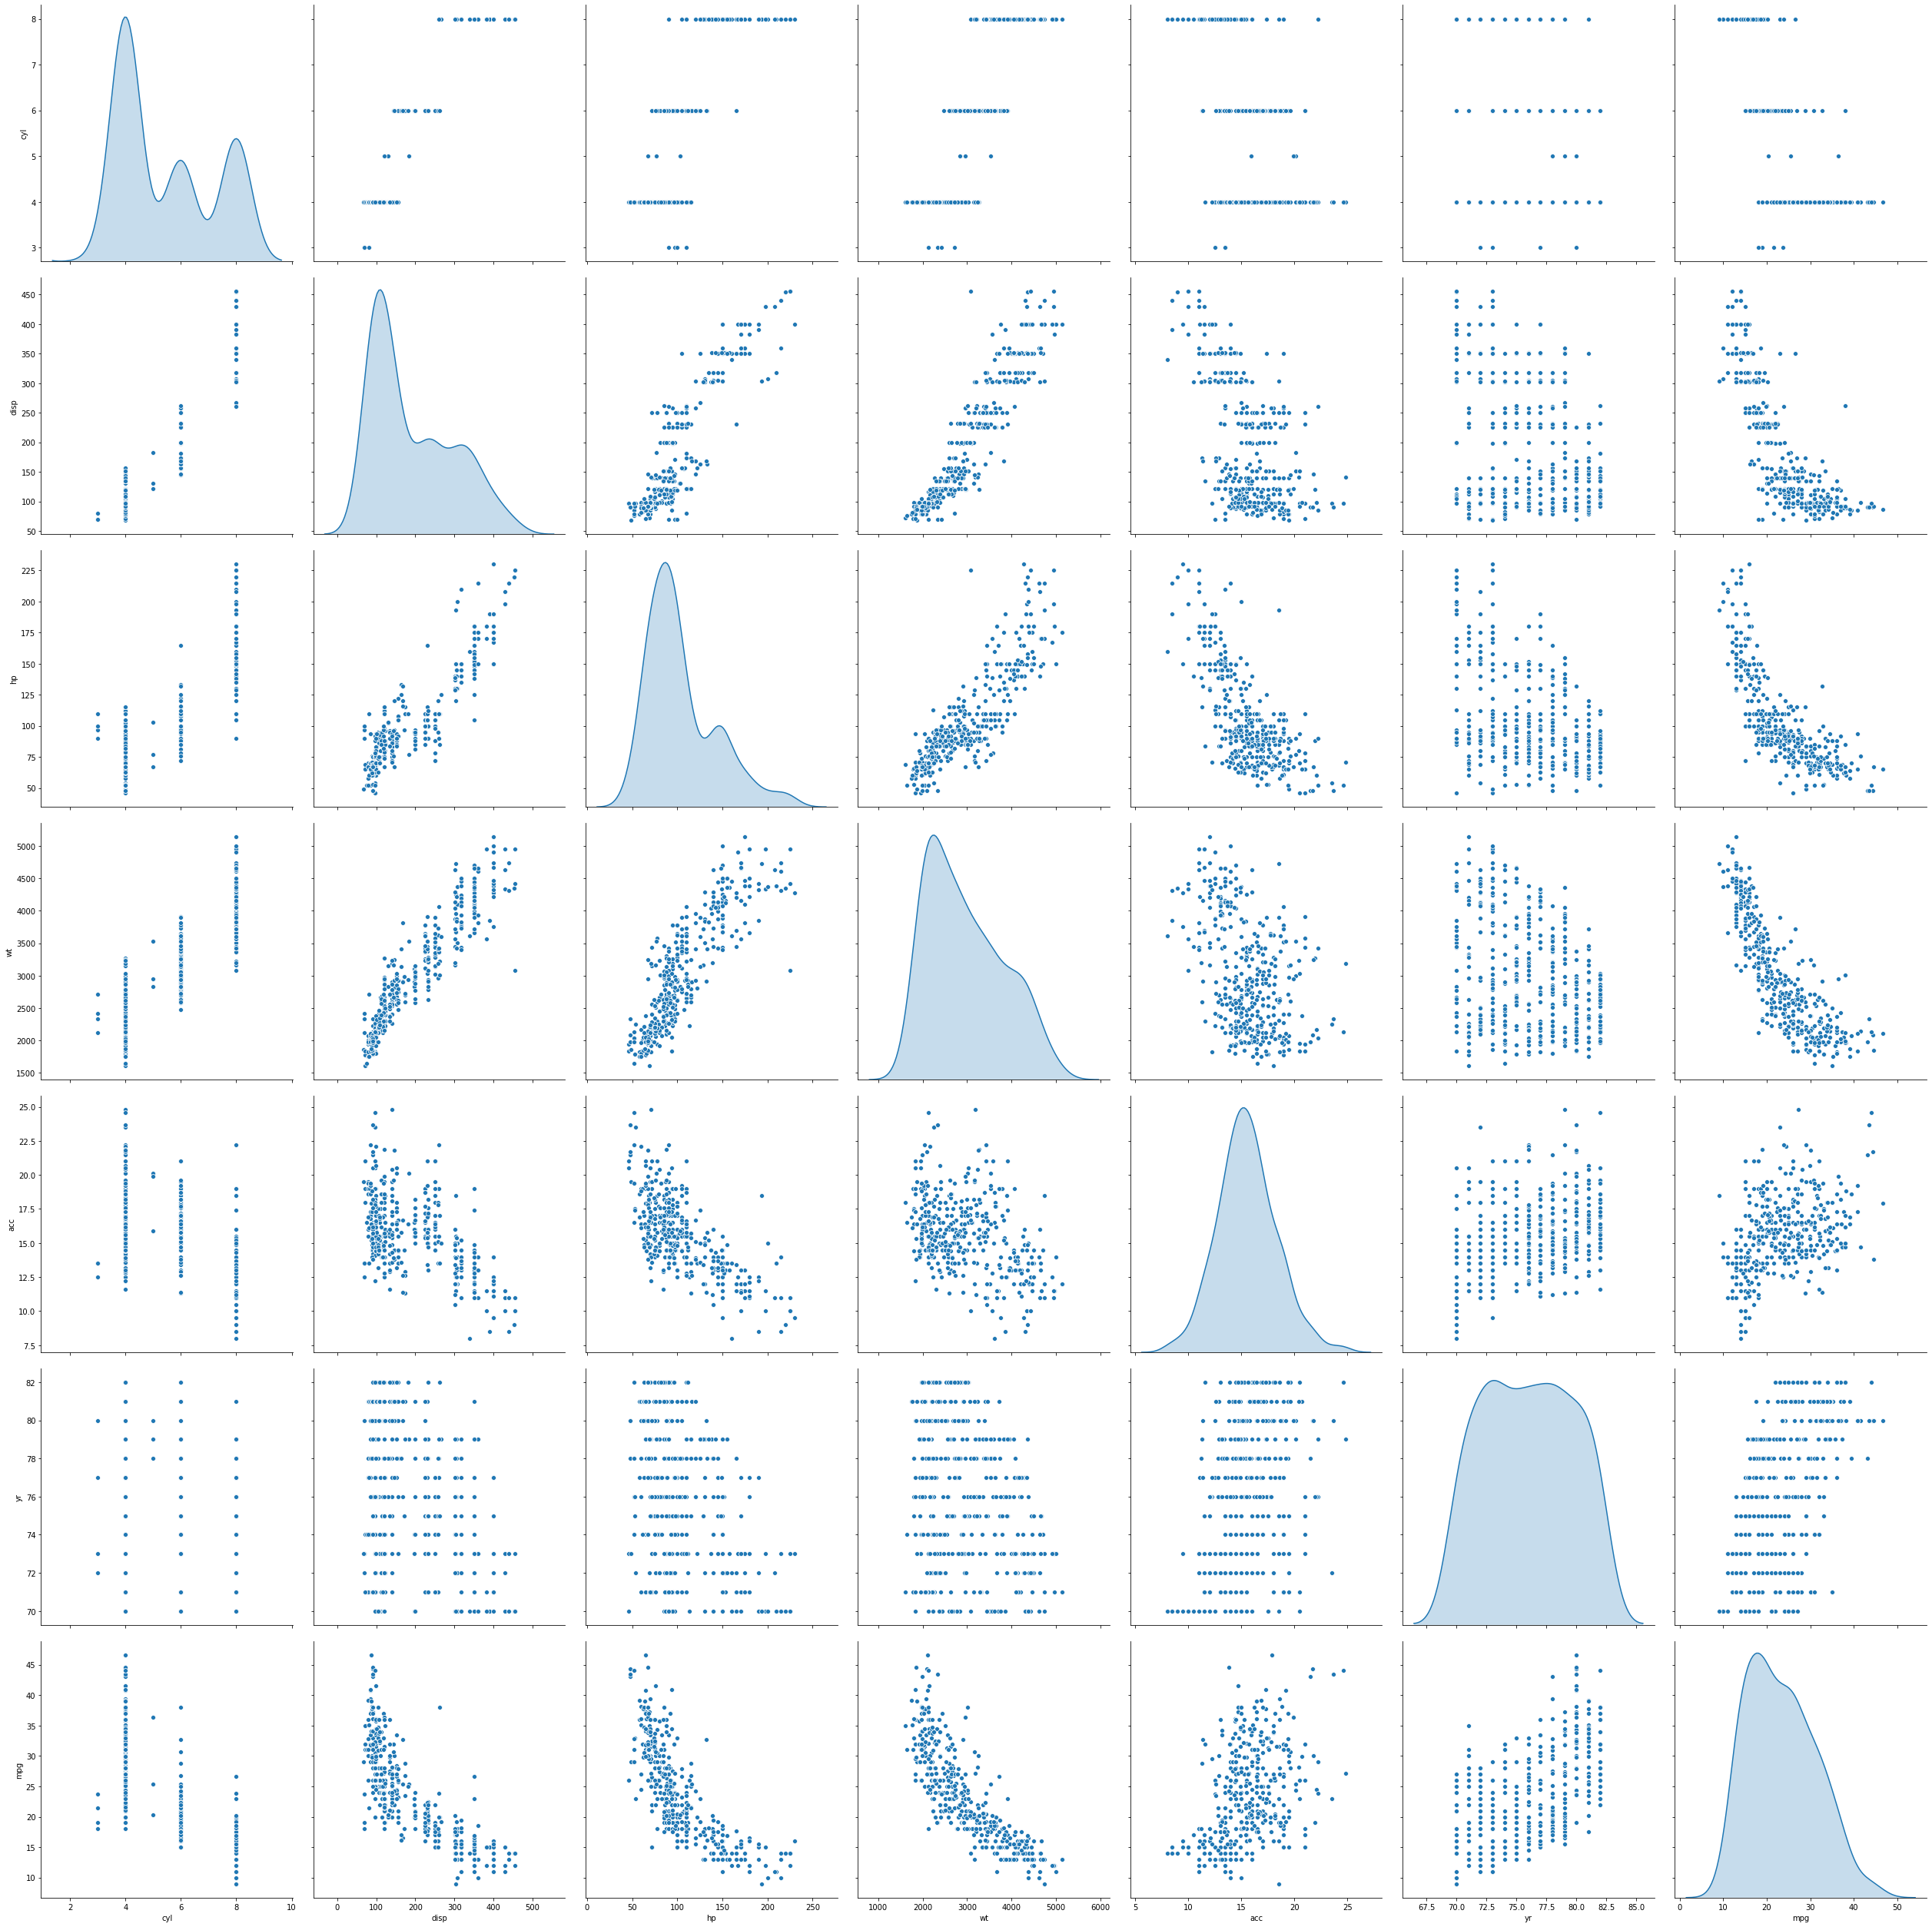

In [15]:
import seaborn as sns
sns.pairplot(data_df,size=5 , diag_kind='kde')

- Observation:
1. The amount of Gaussian curves in the cylinder & dispalcement attributes showing there might be a 3 clusters.
2. hp is having two peaks & long tail at the right hand side.
3. acceleration is normally distributed.
4. wt, yr & mpg having overlapping peaks . 

In [16]:
data_df.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.804203
hp,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.773453
wt,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,1.000000


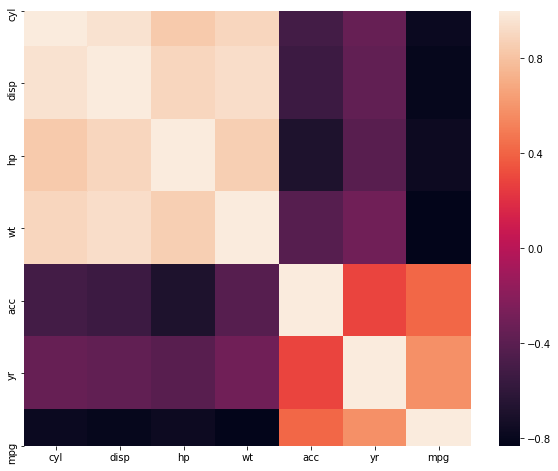

In [17]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

- cyl, disp, hp, & wt are highly negatively correlated with target attribute 'mpg'.
- cyl, disp, hp, & wt are also highly correlated with each other.

# Scaling the data

In [18]:
from scipy.stats import zscore
car_df = data_df.apply(zscore)

In [19]:
car_df

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543
...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,0.446497
394,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,2.624265
395,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,1.087017
396,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,0.574601


# Creating Clusters using KMeans

In [20]:
cluster_range = range( 2, 11)   
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5, random_state=0 )
  clusters.fit(car_df)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(car_df, labels, metric='euclidean'))






# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg_Sil_Score": cluster_sil_scores } )
clusters_df[0:15]

,num_clusters,cluster_errors,Avg_Sil_Score
0,2,1294.841895,0.482359
1,3,946.019791,0.353148
2,4,738.408376,0.348268
3,5,668.377489,0.324177
4,6,597.263256,0.279276
5,7,541.550454,0.275158
6,8,500.015294,0.263331
7,9,471.088888,0.268152
8,10,423.550691,0.261068


Text(0, 0.5, 'cluster_errors')

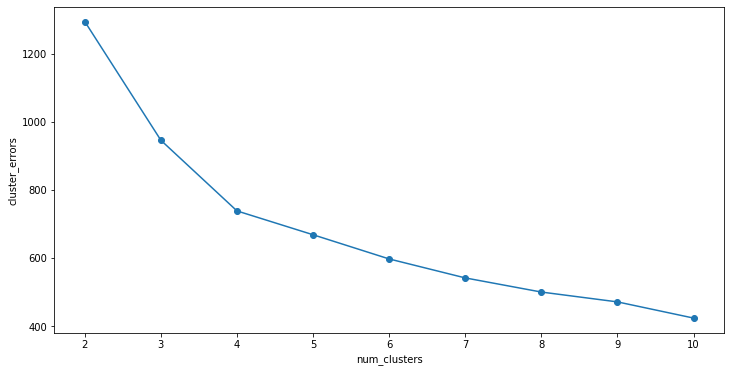

In [21]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('num_clusters')
plt.ylabel('cluster_errors')

#### - The elbow plot shows that 4 might be a good choice for K.

Text(0, 0.5, 'Avg_Sil_Score')

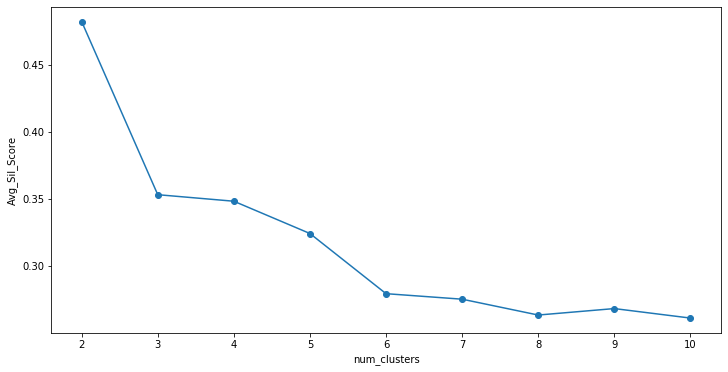

In [22]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.Avg_Sil_Score, marker = "o" )
plt.xlabel('num_clusters')
plt.ylabel('Avg_Sil_Score')

## KMeans model with K=4

In [23]:
Clus_kmeans = KMeans( n_clusters = 4, random_state = 0 )
Clus_kmeans.fit(car_df)
Clus_kmeans_label = Clus_kmeans.labels_     
score = metrics.silhouette_score(car_df, Clus_kmeans_label, metric='euclidean')
print ('silhouette_score',score)

silhouette_score 0.3482682871977345


In [24]:
Clus_kmeans_label

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 1, 0, 0,
       0, 0, 0, 1, 0, 3, 3, 0, 0, 0, 0, 3, 0, 1, 3, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 1, 1, 1, 1, 0, 0, 0,
       2, 1, 1, 1, 1, 0, 2, 0, 0, 0, 3, 0, 1, 1, 3, 3, 3, 3, 2, 2, 2, 0,
       2, 3, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 2, 0, 0, 0, 2, 2, 2, 2, 1,
       0, 0, 2, 2, 2, 2, 2, 1, 3, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1,
       3, 3, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       3, 3, 1, 3, 3, 1, 3, 2, 2, 2, 2, 1, 1, 2, 1,

In [25]:
prediction= Clus_kmeans.predict(car_df)  
car_df["Clus_kmeans4"] = prediction  # Store the cluster id into a new "group" column


car_df.head(10)

,cyl,disp,hp,wt,acc,yr,mpg,Clus_kmeans4
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,3
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,3
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439,3
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647,3
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,3
5,1.498191,2.262118,2.454408,1.620492,-2.021656,-1.627426,-1.090751,3
6,1.498191,2.502182,3.030708,1.635863,-2.384735,-1.627426,-1.218855,3
7,1.498191,2.367746,2.899730,1.586204,-2.566274,-1.627426,-1.218855,3
8,1.498191,2.511784,3.161685,1.719809,-2.021656,-1.627426,-1.218855,3
9,1.498191,1.887617,2.244844,1.039961,-2.566274,-1.627426,-1.090751,3


### o Separate the clusters

In [26]:
cluster0 = car_df[car_df['Clus_kmeans4'] == 0]
cluster1 = car_df[car_df['Clus_kmeans4'] == 1]
cluster2 = car_df[car_df['Clus_kmeans4'] == 2]
cluster3 = car_df[car_df['Clus_kmeans4'] == 3]

In [27]:
cluster0.head(5)

,cyl,disp,hp,wt,acc,yr,mpg,Clus_kmeans4
14,-0.856321,-0.772295,-0.243723,-0.707544,-0.206262,-1.627426,0.062185,0
17,0.320935,0.063128,-0.505677,-0.453340,0.156817,-1.627426,-0.322127,0
18,-0.856321,-0.925936,-0.427091,-0.993671,-0.387801,-1.627426,0.446497,0
19,-0.856321,-0.925936,-1.527300,-1.342463,1.790672,-1.627426,0.318393,0
20,-0.856321,-0.801103,-0.453287,-0.352841,0.701436,-1.627426,0.190289,0


In [28]:
cluster1.head(5)

,cyl,disp,hp,wt,acc,yr,mpg,Clus_kmeans4
15,0.320935,0.043923,-0.243723,-0.162483,-0.024722,-1.627426,-0.194023,1
16,0.320935,0.053526,-0.191332,-0.232242,-0.024722,-1.627426,-0.706439,1
33,0.320935,0.370411,-0.112746,-0.397770,-0.932419,-1.356642,-0.578335,1
34,0.320935,0.303193,0.018232,0.554017,-0.024722,-1.356642,-0.962647,1
35,0.320935,0.543257,-0.112746,0.423960,-0.024722,-1.356642,-0.834543,1


In [29]:
cluster2.head(5)

,cyl,disp,hp,wt,acc,yr,mpg,Clus_kmeans4
198,-0.856321,-0.983552,-1.343932,-1.389757,0.665128,-0.002721,1.215121,2
204,-0.856321,-1.041167,-0.898609,-1.159200,0.519896,-0.002721,1.087017,2
216,-0.856321,-0.916334,-0.951000,-1.094171,1.064514,0.268063,1.022965,2
217,-0.856321,-0.791500,-0.636655,-0.964113,-0.278877,0.268063,0.830809,2
218,-0.856321,-1.098783,-1.212954,-1.354286,1.100822,0.268063,1.599433,2


In [30]:
cluster3.head(5)

,cyl,disp,hp,wt,acc,yr,mpg,Clus_kmeans4
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,3
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,3
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439,3
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647,3
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,3


## Linear regression model- cluster0

In [31]:
X = cluster0.drop('mpg',axis=1)    
y = cluster0['mpg']

In [32]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=2)

In [33]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
print ('Coefficients ', regression_model.coef_)

Coefficients  [ 0.38563391 -0.46212426 -0.24592023 -0.54355398 -0.07444933  0.11726829
  0.        ]


In [34]:
regression_model.intercept_

-0.2754208418691938

In [35]:
cluster0 = regression_model.score(X_test, y_test)
cluster0

0.6361839842545887

## Linear regression model- cluster1

In [36]:
X1 = cluster1.drop('mpg',axis=1)    
y1 = cluster1['mpg']

In [37]:
X_train1, X_test1, y_train1, y_test1 = model_selection.train_test_split(X1, y1, test_size=0.30, random_state=4)

In [38]:
regression_model = LinearRegression()
regression_model.fit(X_train1, y_train1)
print ('Coefficients-',regression_model.coef_)

Coefficients- [ 0.00228198 -0.21436141 -0.23120229 -0.19928389 -0.13221079  0.21067362
  0.        ]


In [39]:
regression_model.intercept_

-0.385840980269308

In [40]:
cluster1 = regression_model.score(X_test1, y_test1)
cluster1 

0.05784450833248145

## Linear regression model- cluster2

In [41]:
X2 = cluster2.drop('mpg',axis=1)    
y2 = cluster2['mpg']

X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(X2, y2, test_size=0.30, random_state=10)

In [42]:
regression_model = LinearRegression()
regression_model.fit(X_train2, y_train2)
print ('coefficients-',regression_model.coef_)

coefficients- [ 0.93876875 -0.35746345 -0.21054155 -0.84019159  0.13206154  0.35074689
  0.        ]


In [43]:
regression_model.intercept_

0.4314692044185713

In [44]:
cluster2 = regression_model.score(X_test2, y_test2)
cluster2

0.7043108539621568

## Linear regression model- cluster3

In [45]:
X3 = cluster3.drop('mpg',axis=1)    
y3 = cluster3['mpg']

X_train3, X_test3, y_train3, y_test3 = model_selection.train_test_split(X3, y3, test_size=0.30, random_state=6)

In [46]:
regression_model = LinearRegression()
regression_model.fit(X_train3, y_train3)
print ('coefficients-',regression_model.coef_)

coefficients- [-0.46048741 -0.07679325 -0.11114936 -0.06586395 -0.22104491  0.18890364
  0.        ]


In [47]:
regression_model.intercept_

-0.21206514821827827

In [48]:
cluster3 = regression_model.score(X_test3, y_test3)
cluster3

0.6514587074092215

In [49]:
compare = [cluster0, cluster1, cluster2, cluster3]
pd.DataFrame(compare, columns= ['Accuracy'], index = ['CLuster0','CLuster1','CLuster2','CLuster3'] )

,Accuracy
CLuster0,0.636184
CLuster1,0.057845
CLuster2,0.704311
CLuster3,0.651459
